# Before jumping to the code implementation
***
- Git을 사용하지 않고 해당 ipynb파일만 다운받고 싶으면 wget이나 curl을 사용하여도 좋습니다. 
    - wget https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture10-Unsupervised_clustering-gene_subtyping.ipynb
    - curl https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture10-Unsupervised_clustering-gene_subtyping.ipynb --output Lecture10-Unsupervised_clustering-gene_subtyping.ipynb
<br><br><br>    
- 동영상과 같이 git clone을 사용하고 싶은 학생이 주의하여야 할 점은 git은 원칙적으로 이미 존재하는 디렉토리에는 clone을 하지 않으므로 디렉토리 (예를 들자면 /Documents/BioDataMining)를 지워주고 실행하여야 합니다. 
- Open the terminal and make a directory dedicated for this class code implementation (e.g., mkdir ~/Documents/BioDataMining)
- Install Git (https://git-scm.com/book/en/v2/Getting-Started-Installing-Git)
- Go to the directory for this class, and type: git clone https://github.com/COMBINE-SKKU/bio_data_mining.git
- If you are a newbie for programming a python and jupyter notebook, please install anaconda 
    - Window: https://problemsolvingwithpython.com/01-Orientation/01.03-Installing-Anaconda-on-Windows/
    - Mac: https://problemsolvingwithpython.com/01-Orientation/01.04-Installing-Anaconda-on-MacOS/
    - Linux: https://problemsolvingwithpython.com/01-Orientation/01.05-Installing-Anaconda-on-Linux/
- And learn how to open a jupyter notebook (https://www.youtube.com/watch?v=OJMILWh6ARY)
- Run the following codes.

# Clustering algorithms
---
- <b>Partioning</b> methods
- <b>Density</b> based methods
- <b>Hierarchical clustering</b> methods
<br><br>
- Commonality: (di-)similarity between a pair of data points
- Difference: The way to form a cluster
<br><br>
- Issues: How many clusters exist in the data?
    - 1) <b>Goodness-of-fit</b>: how well the identified clusters can homogenize the variability of the given datasets?
    - 2) <b>Stability</b>: how consistent the identified clusters can be captured across differently subsampled cases?
<br><br>    
- <u>Today's task</u>: 
    - 1) Test two different algorithms (<i>i.e.,</i> k-means, hierarchiccal clustering) to get a sense of how to use the method.
    - 2) An biodata clustering example: NCI60 Cancer cell line microarray data

Text(0, 0.5, 'X1')

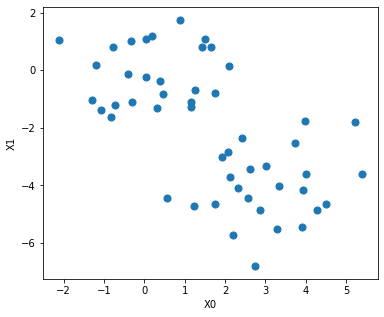

In [2]:
# Data generation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

f, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X[:,0], X[:,1], s=50) 
ax.set_xlabel('X0')
ax.set_ylabel('X1')

In [3]:
# We now perform K-means clustering with K = 2
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 123).fit(X)

# The cluster assignments of the 50 observations are contained in kmeans.labels_
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0, 0.5, 'X1')

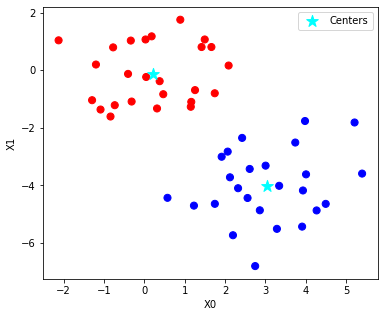

In [4]:
# Here the observations can be easily plotted because they are two-dimensional. 
# If there were more than two variables,  we could instead perform PCA and plot the first two principal components score vectors.
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = 50, c = kmeans.labels_, cmap = plt.cm.bwr) 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 150,
            color = 'cyan', 
            label = 'Centers')
plt.legend(loc = 'best')
plt.xlabel('X0')
plt.ylabel('X1')

Text(0, 0.5, 'X1')

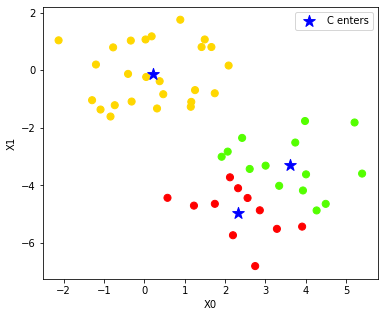

In [7]:
# We now perform K-means clustering with K = 3
kmeans_3_clusters = KMeans(n_clusters = 3, random_state = 123)
kmeans_3_clusters.fit(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans_3_clusters.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans_3_clusters.cluster_centers_[:, 0], kmeans_3_clusters.cluster_centers_[:, 1], marker='*', s=150,
            color='blue', label='C enters')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

# Drawback of k-means algorithm
---
- The result depends on the random initialization of the first clustering solution.
- Therefore we have to perform multiple iterations of the k-means algorithm (to choose the best clustering result).
- The degree of how good this solution is can be indexed by the metric called '<b>inertia</b>'. This metricc is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering.
<br><br>
- To run the `Kmeans()` function in python with multiple initial cluster assignments, we use the `n_init` argument (default: 10). 
- If a value of `n_init` greater than one is used, then K-means clustering will be performed using multiple random assignments, and the `Kmeans()` function will report only the best results. 
- It is generally recommended to always run K-means clustering with a large value of `n_init`, such as 20 or 50 to avoid getting stuck in an undesirable local optimum.
- Here we compare using `n_init = 1`:

In [8]:
#km_out_single_run = KMeans(n_clusters = 3, n_init = 1, random_state = 123).fit(X)
km_out_single_run = KMeans(n_clusters = 4, n_init = 20, random_state = 123).fit(X)

km_out_single_run.inertia_

77.49420367326495

# Hierarchical Clustering
---
- Bottom up approach (Agglomerative)
- Top down approach (Divisive)
<br><br>
- The `linkage()` function from `scipy` implements several ways to determine the distance between clusters (<i>i.e.,</i> single, centroid, complete, average, ward). 
<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week10/Fig10-1.png' width="600"/>

In [9]:
from scipy.cluster.hierarchy import linkage

# We could just as easily perform hierarchical clustering with average or single linkage instead:
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

- Plot the dendrograms obtained using the usual `dendrogram()` function.
- The numbers at the bottom of the plot identify each observation:

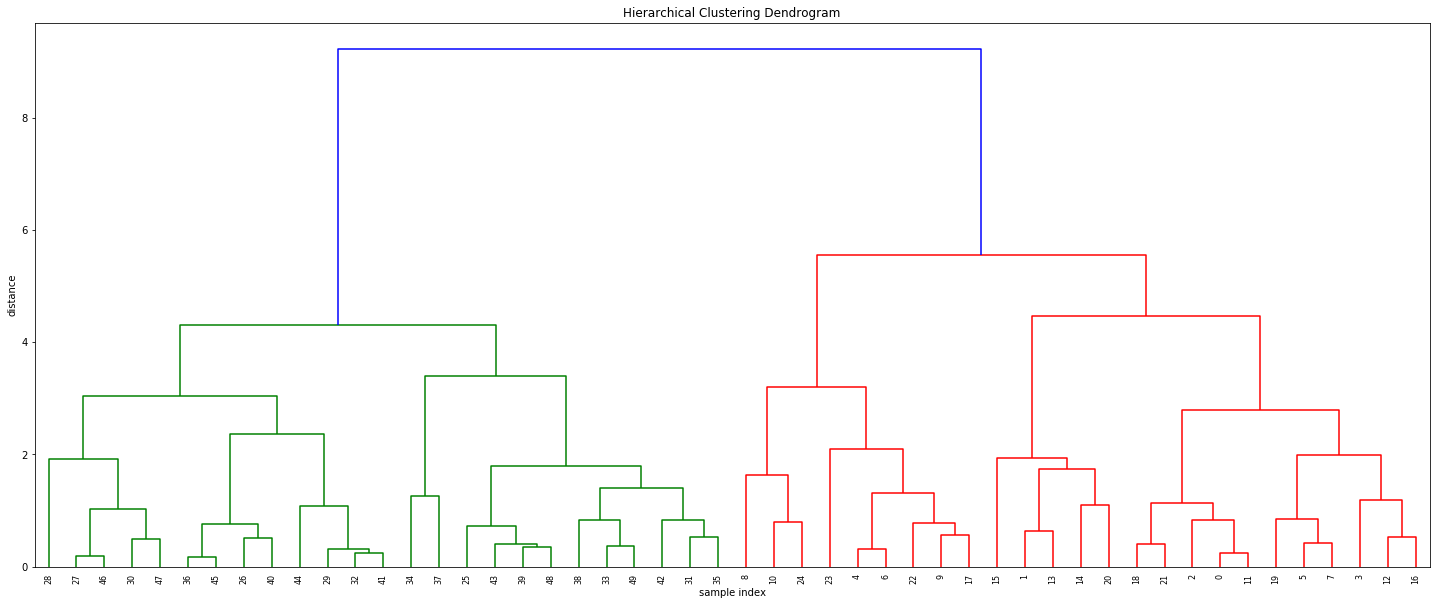

In [10]:
from scipy.cluster.hierarchy import dendrogram

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

- To determine the cluster labels at the level ones wish to subgroup, we can use the `cut_tree()` function:

In [11]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_complete, n_clusters = 2).T) # Printing transpose just for space

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


# NCI60 Data Example
---
- Hierarchical and K-means clustering compare on the `NCI60` cancer cell line microarray data, which consists of 6,830 gene expression measurements on 64 cancer cell lines:

In [12]:
# The NCI60 data
nci_labs = pd.read_csv("http://www.science.smith.edu/~jcrouser/SDS293/data/nci60_labs.csv", index_col = 0)
nci_data = pd.read_csv("http://www.science.smith.edu/~jcrouser/SDS293/data/nci60_data.csv", index_col = 0)

# Each cell line is labeled with a cancer type. We'll ignore the cancer types in performing clustering, as these are unsupervised techniques. After performing clustering, we'll use this column to see the extent to which these cancer types agree with the results of these unsupervised techniques. The data has 64 rows and 6,830 columns.
nci_labs

,x
1,CNS
2,CNS
3,CNS
4,RENAL
5,BREAST
...,...
60,MELANOMA
61,MELANOMA
62,MELANOMA
63,MELANOMA


In [14]:
nci_data.shape

(64, 6830)

In [15]:
nci_labs.x.value_counts(sort=True)

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
MCF7A-repro    1
MCF7D-repro    1
K562A-repro    1
UNKNOWN        1
K562B-repro    1
Name: x, dtype: int64

# Clustering the Observations of the NCI60 Data
---
- Hierarchically cluster the cell lines in the `NCI60` data, with the goal of finding out whether or not the observations cluster into distinct types of cancer.

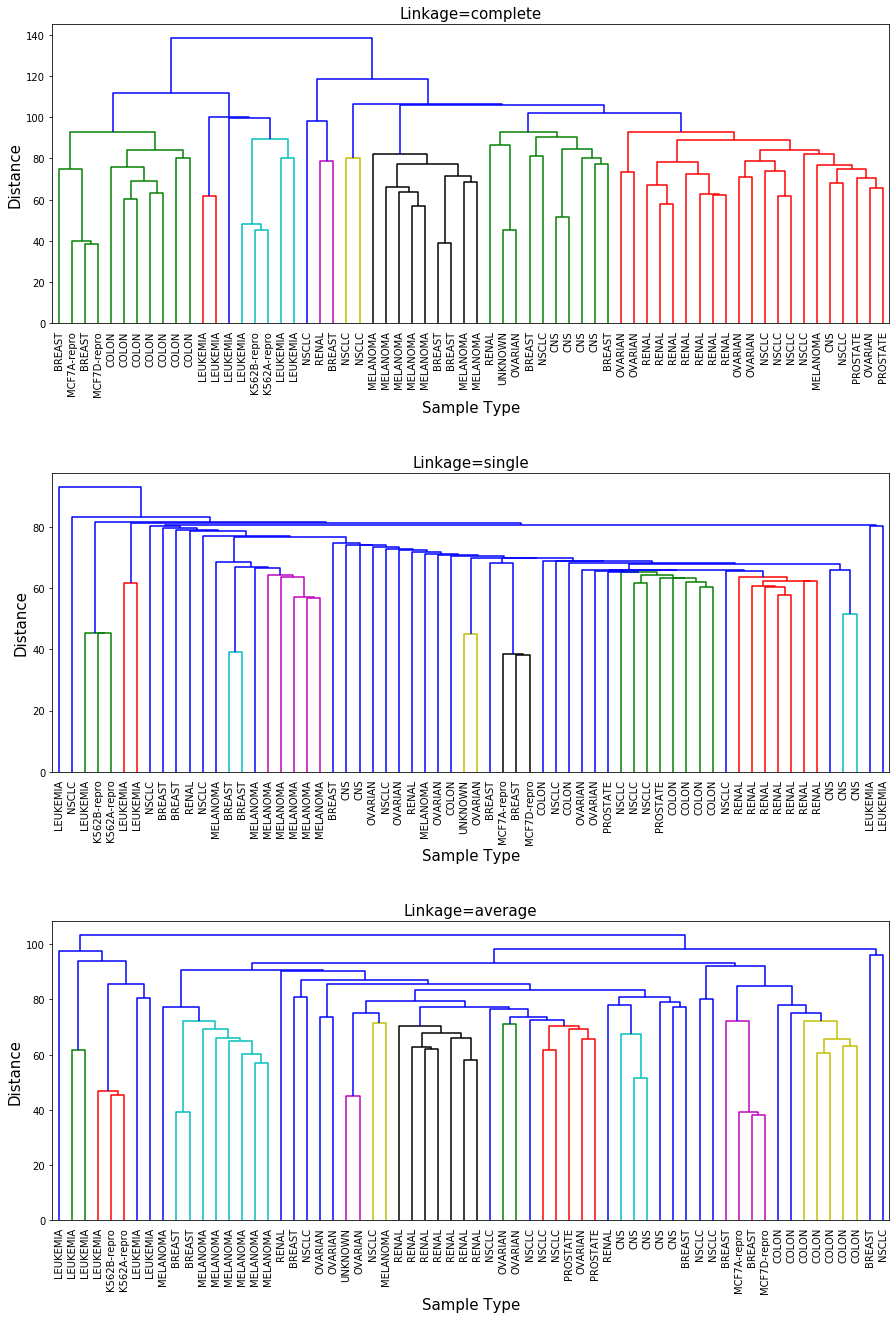

In [16]:
nci_data.index = nci_labs.x

fig, ax = plt.subplots(3,1, figsize=(15,22))
fig.subplots_adjust(hspace=0.5)

linkages = ['complete', 'single', 'average']
for link, axis in zip(linkages, fig.axes):
    hc = linkage(y = nci_data, method=link, metric='euclidean') 
    axis.set_title("Linkage=%s" % link, size=15)
    axis.set_xlabel('Sample Type', size=15)
    axis.set_ylabel('Distance', size=15)
    dendrogram(hc, ax=axis, labels=nci_data.index, leaf_rotation=90, leaf_font_size=10)

# The choice of Linkage 
---
- We see that the choice of linkage certainly does affect the results obtained. 
- Typically, single linkage will tend to yield trailing clusters: very large clusters onto which individual observations attach one-by-one. 
- On the other hand, complete and average linkage tend to yield more balanced, attractive clusters. For this reason, complete and average linkage are generally preferred to single linkage. 
- Clearly cell lines within a single cancer type do tend to cluster together, although the clustering is not perfect. 

In [17]:
nci_hc_complete = linkage(y = nci_data, method="complete", metric='euclidean') 

nci_hc_complete_4_clusters = cut_tree(nci_hc_complete, n_clusters = 4) # Printing transpose just for space

pd.crosstab(index = nci_data.index, 
            columns = nci_hc_complete_4_clusters.T[0], 
            rownames = ['Cancer Type'], 
            colnames = ['Cluster'])

Cluster,0,1,2,3
Cancer Type,,,,
BREAST,4,1,0,2
CNS,5,0,0,0
COLON,0,0,0,7
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


There are some clear patterns. All the leukemia cell lines fall in cluster 2,
while the breast cancer cell lines are spread out over three different clusters.
We can plot the cut on the dendrogram that produces these four clusters by adding an `axhline()`, which draws a horizontal line on top of our plot:

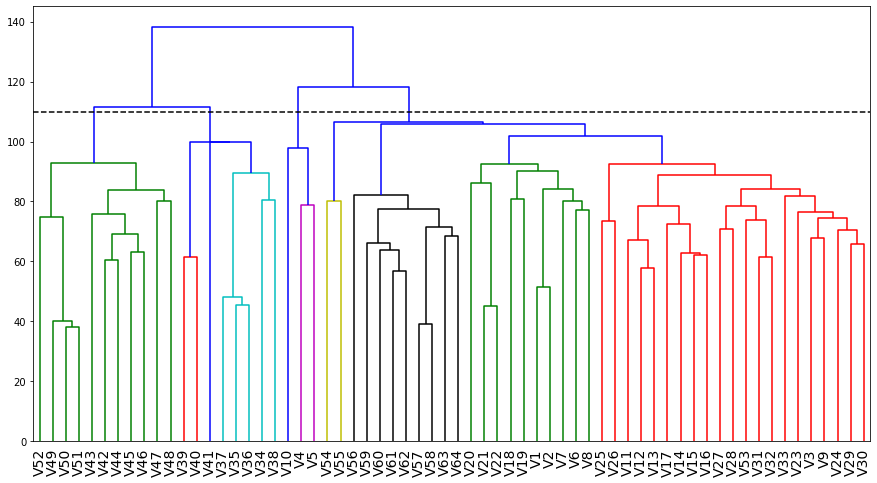

In [43]:
fig, ax = plt.subplots(1,1, figsize = (15,8))
dendrogram(nci_hc_complete, 
           labels = nci_data.index, 
           leaf_font_size = 14, 
           show_leaf_counts = True)  

plt.axhline(y=110, c='k', ls='dashed')
plt.show()

We claimed earlier that K-means clustering and hierarchical clustering with the dendrogram cut to obtain the same number of clusters can yield **very** different results. How do these `NCI60` hierarchical clustering results compare to what we get if we perform K-means clustering with `K = 4`?

In [45]:
kmean_4 = KMeans(n_clusters = 4, random_state = 123, n_init = 150)    
kmean_4.fit(nci_data)
kmean_4.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

We can use a confusion matrix to compare the differences in how the two methods assigned observations to clusters:

In [20]:
pd.crosstab(index = kmean_4.labels_, 
            columns = nci_hc_complete_4_clusters.T[0], 
            rownames = ['K-Means'], 
            colnames = ['Hierarchical'])

Hierarchical,0,1,2,3
K-Means,,,,
0,8,0,0,11
1,0,0,8,0
2,25,3,0,0
3,9,0,0,0


We see that the four clusters obtained using hierarchical clustering and Kmeans clustering are somewhat different. Cluster 0 in K-means clustering is almost identical to cluster 2 in hierarchical clustering. However, the other clusters differ: for instance, cluster 2 in K-means clustering contains a portion of the observations assigned to cluster 0 by hierarchical clustering, as well as all of the observations assigned to cluster 1 by hierarchical clustering.